Our data: read the Iowa data file into a Pandas DataFrame called `home_data`.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Path of the file to read
iowa_file_path = './train.csv'

home_data = pd.read_csv(iowa_file_path)

## Goal: predict house selling price

In [14]:
Y = home_data.SalePrice
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Summary stats

In [15]:
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
# average lot size
avg_lot_size = int(round(home_data["LotArea"].mean()))
print(avg_lot_size)

# As of today, how old is the newest home
newest_home_age = 2018 - home_data["YearBuilt"].max()
print(newest_home_age)

avg_qual = int(round(home_data["OverallQual"].mean()))
print(avg_qual)

10517
8
6


In [17]:
# most correlated features
corr = home_data.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
#this you can see at the time of heatmap also.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

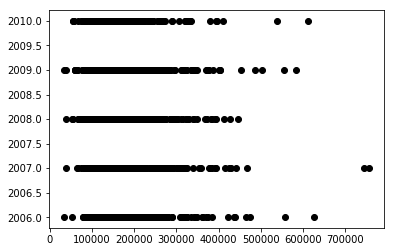

In [18]:
plt.scatter(y =home_data["YrSold"],x = 
            home_data["SalePrice"],c = 'black')
plt.show()
#check for outliers

## Features

In [19]:
home_data["BathTotal"] = home_data["FullBath"] + home_data["HalfBath"]

In [20]:
home_data["Deck"] = home_data["WoodDeckSF"] + home_data["OpenPorchSF"] + home_data["ScreenPorch"]

In [21]:
home_features = ['LotArea', 'Deck', 'YearBuilt', 'GarageCars', 'OverallQual', '1stFlrSF', '2ndFlrSF', 'BathTotal', 'BedroomAbvGr', 'Fireplaces', 'TotRmsAbvGrd']

X = home_data[home_features]
X.head()

,LotArea,Deck,YearBuilt,GarageCars,OverallQual,1stFlrSF,2ndFlrSF,BathTotal,BedroomAbvGr,Fireplaces,TotRmsAbvGrd
0,8450,61,2003,2,7,856,854,3,3,0,8
1,9600,298,1976,2,6,1262,0,2,3,1,6
2,11250,42,2001,2,7,920,866,3,3,1,6
3,9550,35,1915,3,7,961,756,1,3,1,7
4,14260,276,2000,3,8,1145,1053,3,4,1,9


## Train & Test sets

In [22]:
from sklearn.model_selection import train_test_split

# split data into training and validation data
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state = 0)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(1095, 11) (365, 11) (1095,) (365,)


## Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# the model
house_model = RandomForestRegressor(random_state=2)

# Fit model
house_model.fit(train_X, train_y)

In [24]:
from sklearn.metrics import mean_absolute_error

val_predictions = house_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

20664.6897716895
